# Banxi Rates

Calculate sediment accumulation rates in the Banxi Group using zircon U-Pb CA-ID-TIMS constraints from the Hongzixi section.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

Measured values:

In [2]:
H2_470_age = 814.58
H2_470_age_uncertainty = 0.10 #PLACEHOLDER
H2_470_height = 1586.2

H3_60_age = 812.7
H3_60_age_uncertainty = 0.10 #PLACEHOLDER
H3_60_height = 2622.4

H3_8_age = 805.4
H3_8_age_uncertainty = 0.10 #PLACEHOLDER
H3_8_height = 3389.3

# uncertainty in height as a ratio
height_error = 0.01

Generate normal distributions:

In [3]:
N = 50000

H2_470_ages = np.random.normal(H2_470_age, H2_470_age_uncertainty/2, N)
H2_470_heights = np.random.normal(H2_470_height, H2_470_height*height_error, N)

H3_60_ages = np.random.normal(H3_60_age, H3_60_age_uncertainty/2, N)
H3_60_heights = np.random.normal(H3_60_height, H3_60_height*height_error, N)

H3_8_ages = np.random.normal(H3_8_age, H3_8_age_uncertainty/2, N)
H3_8_heights = np.random.normal(H3_8_height, H3_8_height*height_error, N)

Get sediment accumulation rates:

In [4]:
H_lower_rates = np.array([])
H_upper_rates = np.array([])
for i in range(N):
    H_lower_rate = -(H2_470_heights[i] - H3_60_heights[i]) / (H2_470_ages[i] - H3_60_ages[i])
    H_lower_rates = np.append(H_lower_rates, H_lower_rate)
    
    H_upper_rate = -(H3_60_heights[i] - H3_8_heights[i]) / (H3_60_ages[i] - H3_8_ages[i])
    H_upper_rates = np.append(H_upper_rates, H_upper_rate)

Plot:

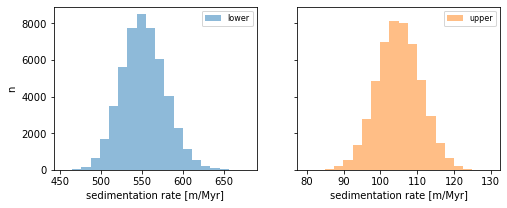

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(8,3), sharey=True)

ax[0].hist(H_lower_rates, bins=20, histtype='stepfilled', color='C0', alpha=0.5, label='lower')
ax[0].set_xlabel('sedimentation rate [m/Myr]')
ax[0].set_ylabel('n')
ax[0].legend(fontsize=8)

ax[1].hist(H_upper_rates, bins=20, histtype='stepfilled', color='C1', alpha=0.5, label='upper')
ax[1].set_xlabel('sedimentation rate [m/Myr]')
ax[1].legend(fontsize=8)

plt.show(fig)

In [6]:
print('lower:')
print('  mean = {:.2f} m/m.y.'.format(np.mean(H_lower_rates)))
print(' 2.5 % = {:.2f} m/m.y.'.format(stats.scoreatpercentile(H_lower_rates, 2.5)))
print('97.5 % = {:.2f} m/m.y.'.format(stats.scoreatpercentile(H_lower_rates, 97.5)))

print('')
            
print('upper:')
print('  mean = {:.2f} m/m.y.'.format(np.mean(H_upper_rates)))
print(' 2.5 % = {:.2f} m/m.y.'.format(stats.scoreatpercentile(H_upper_rates, 2.5)))
print('97.5 % = {:.2f} m/m.y.'.format(stats.scoreatpercentile(H_upper_rates, 97.5)))

lower:
  mean = 552.00 m/m.y.
 2.5 % = 502.76 m/m.y.
97.5 % = 606.40 m/m.y.

upper:
  mean = 105.04 m/m.y.
 2.5 % = 93.47 m/m.y.
97.5 % = 116.66 m/m.y.
